# Implementing gradient descent

In [89]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [90]:
import numpy as np

np.random.seed(1)  # for reproducible results

In [125]:
N = 100  # Number of samples
X = 5 * np.random.rand(N, 1)  # Feature vectors
y = 2 * X + 1 + np.random.randn(N, 1)  # Labels (slope = 2, intercept = 1)

X_b = np.c_[X, np.ones((N, 1))]  # Append 1 to each feature vector

In [92]:
# Gradient descent
eta = 0.1  # learning rate
n_iters = 1000  # Number of iterations

theta = np.random.randn(2, 1)  # Random initialization of weights

for i in range(n_iters):
    grad_loss = 2 / N * X_b.T @ (X_b @ theta - y)
    theta -= eta * grad_loss

In [93]:
print(f"theta: {theta}")

theta: [[1.93698502]
 [1.23695725]]


In [94]:
theta

array([[1.93698502],
       [1.23695725]])

We can do better by checking the difference between iterations

In [152]:
# Gradient descent
eta = 0.1  # learning rate
n_iters = 1000  # Number of iterations

theta = np.random.randn(2, 1)  # Random initialization of weights

# Gradient descent loop
for iteration in range(n_iters):
    # Calculate gradient of the loss function
    grad_loss = (2 / N) * X_b.T @ (X_b @ theta - y)

    # Update theta
    new_theta = theta - eta * grad_loss

    # Check for convergence (change in theta is below tolerance)
    if np.linalg.norm(new_theta - theta, ord=2) < 0.001:
        print(f"Converged after {iteration + 1} iterations.")
        break

    # Update theta
    theta = new_theta

print("theta: ", theta)

Converged after 115 iterations.
theta:  [[1.94579929]
 [1.11810325]]


### Let's try to implement mini-batch gradient descent

In [163]:
eta_0, eta_1 = 0.1, 0.01  # Learning rate scheduler


def lr(t):
    return (1 - t) * eta_0 + t * eta_1


theta = np.random.randn(2, 1)

epochs = 50
batch_size = 10
batches_per_epoch = np.int32(N / batch_size)

for epoch in range(epochs):
    for iteration in range(batches_per_epoch):
        idx = np.random.choice(N, size=batch_size, replace=False)
        xt, yt = X_b[idx], y[idx]
        grad_loss = (2 / N) * xt.T @ (xt @ theta - yt)
        eta = lr((epoch * batches_per_epoch + 1) / (epochs * batches_per_epoch))
        theta -= eta * grad_loss

print(theta)

[[2.01916391]
 [0.86262257]]


## Let's try our hands on a MNIST classifier

## Classification problem

In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [26]:
# Generate a synthetic dataset for binary classification
# n_samples: Number of samples
# n_features: Number of features
# n_classes: Number of target classes (binary in this case)
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Split the dataset into training and testing sets
# test_size: Fraction of the data reserved for testing
# shuffle: Shuffle the data before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Build a neural network model
# Input layer specifying the shape of input data (4 features in this case)
inp = tf.keras.layers.Input(shape=(4,))

# Hidden layer 1: Dense layer with 16 neurons and ReLU activation function
x = tf.keras.layers.Dense(16, activation="relu")(inp)

# Hidden layer 2: Another Dense layer with 16 neurons and ReLU activation
x = tf.keras.layers.Dense(16, activation="relu")(x)

# Output layer: Dense layer with 1 neuron and sigmoid activation function
# Sigmoid is used to produce a probability output (between 0 and 1)
out = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Define the model
# The model takes `inp` as input and produces `out` as output
model = tf.keras.Model(inp, out)

# Compile the model
# Loss function: Binary cross-entropy, used for binary classification tasks
# Metrics: Accuracy, to evaluate the model's performance during training
model.compile(loss="binary_crossentropy", metrics="acc")

# Train the model
# validation_split: Reserve 20% of the training data for validation
# batch_size: Number of samples per batch
# epochs: Number of times the model will go through the entire training dataset
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=20)

# Print the model's summary, which shows the architecture and number of parameters
model.summary()

# Predict probabilities for the test set
# The model outputs probabilities between 0 and 1 due to the sigmoid activation in the output layer
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = np.round(y_pred_prob)

# Evaluate the model's performance
# Accuracy: Fraction of correctly classified samples
accuracy = accuracy_score(y_test, y_pred)

# Recall: Proportion of true positives correctly identified
recall = recall_score(y_test, y_pred)

# Precision: Proportion of predicted positives that are actually true positives
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"\nThe accuracy score of the prediction is: {accuracy}")
print(f"\nThe recall score of the prediction is: {recall:.2f}")
print(f"\nThe precision score of the prediction is: {precision:.2f}")

Epoch 1/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5733 - acc: 0.6062 - val_loss: 0.5405 - val_acc: 0.8062
Epoch 2/20
40/40 [==============================] - 0s 897us/step - loss: 0.4976 - acc: 0.8344 - val_loss: 0.4809 - val_acc: 0.8438
Epoch 3/20
40/40 [==============================] - 0s 870us/step - loss: 0.4412 - acc: 0.8547 - val_loss: 0.4318 - val_acc: 0.8625
Epoch 4/20
40/40 [==============================] - 0s 856us/step - loss: 0.3973 - acc: 0.8594 - val_loss: 0.3915 - val_acc: 0.8687
Epoch 5/20
40/40 [==============================] - 0s 868us/step - loss: 0.3652 - acc: 0.8641 - val_loss: 0.3673 - val_acc: 0.8750
Epoch 6/20
40/40 [==============================] - 0s 823us/step - loss: 0.3470 - acc: 0.8672 - val_loss: 0.3498 - val_acc: 0.8750
Epoch 7/20
40/40 [==============================] - 0s 832us/step - loss: 0.3353 - acc: 0.8703 - val_loss: 0.3359 - val_acc: 0.8875
Epoch 8/20
40/40 [==============================] - 0s 848us/step - loss: 0.32

In [41]:
# Visualize the model's training progress using the stats stored in the history object
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
15,0.314197,0.875000,0.318884,0.88750,15
16,0.312722,0.878125,0.314654,0.89375,16
17,0.312178,0.875000,0.316888,0.88750,17
18,0.311869,0.875000,0.310426,0.88750,18
19,0.311509,0.875000,0.313663,0.88750,19


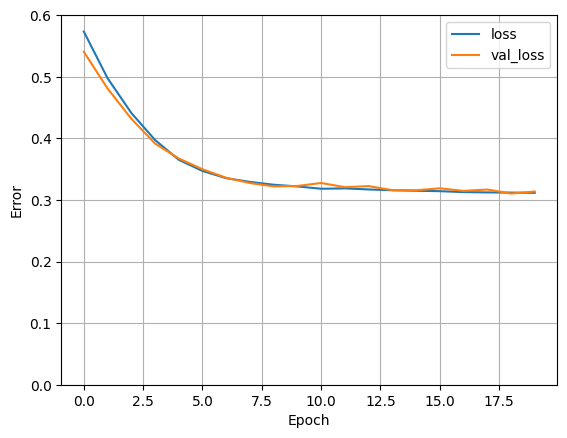

In [53]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([0, 0.6])
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)


plot_loss(history)

## Regression problem

In [29]:
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_regression(n_samples=1000, n_features=4, n_targets=1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

inp = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation="relu")(inp)
x = tf.keras.layers.Dense(16, activation="linear")(x)
out = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inp, out)

model.compile(loss="mse", metrics=["mse"])

model.fit(X_train, y_train, batch_size=16, epochs=20)

model.summary()


X_pred = model.predict(X_test)

Epoch 1/20
50/50 [==============================] - 0s 559us/step - loss: 20188.3340 - mse: 20188.3340
Epoch 2/20
50/50 [==============================] - 0s 527us/step - loss: 19935.7617 - mse: 19935.7617
Epoch 3/20
50/50 [==============================] - 0s 495us/step - loss: 19560.4453 - mse: 19560.4453
Epoch 4/20
50/50 [==============================] - 0s 449us/step - loss: 18988.4258 - mse: 18988.4258
Epoch 5/20
50/50 [==============================] - 0s 433us/step - loss: 18150.2461 - mse: 18150.2461
Epoch 6/20
50/50 [==============================] - 0s 434us/step - loss: 17091.6445 - mse: 17091.6445
Epoch 7/20
50/50 [==============================] - 0s 479us/step - loss: 15740.2217 - mse: 15740.2217
Epoch 8/20
50/50 [==============================] - 0s 495us/step - loss: 14106.6562 - mse: 14106.6562
Epoch 9/20
50/50 [==============================] - 0s 532us/step - loss: 12257.6533 - mse: 12257.6533
Epoch 10/20
50/50 [==============================] - 0s 518us/step - loss